In [1]:
options(warn = -1)
pacotes <- c("tidyquant", "timetk", "dplyr", "ggplot2", "tidyr", "PortfolioAnalytics",
             "corrplot")
for(i in pacotes){
  library(i, character.only = T)
}

Loading required package: lubridate


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union


Loading required package: PerformanceAnalytics

Loading required package: xts

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



Attaching package: 'PerformanceAnalytics'


The following object is masked from 'package:graphics':

    legend


Loading required package: quantmod

Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Version 0.4-0 included new data defaults. See ?getSymbols.

== Need to Learn tidyquant? ====================================================
Business Science offers a 1-hour course - Learning Lab #9: Performance Analysis & Portfolio Optimization with tidyquant!
</> Learn more at: https://university.business-science.io/p/learning-

In [2]:
#Coletando os dados
acoes <- c("B3SA3.SA", "ABEV3.SA", "PETR4.SA", "EGIE3.SA",
          "ITUB4.SA", "MGLU3.SA", "UGPA3.SA", "COGN3.SA")
s <- tq_get(acoes, from = "2010-01-01")

In [3]:
#Mudando os dados
month_retun <- s %>%
  group_by(symbol) %>%
  tq_transmute(select = close, mutate_fun = periodReturn, period = "monthly")
daily_retunr <- s %>%
  group_by(symbol) %>%
  tq_transmute(select = close, mutate_fun = periodReturn, period = "daily")
retornos_m <- month_retun %>%
  mutate(year = year(date)) %>%
  group_by(symbol, year) %>%
  summarise(Retorno_Mensal_Médio = mean(monthly.returns),
            Desvio_Mensal = sd(monthly.returns)) %>%
  gather(Retorno_Mensal_Médio, Desvio_Mensal, key = statistic, value = value)
retornos <- daily_retunr %>%
  mutate(year = year(date)) %>%
  group_by(symbol, year) %>%
  summarise(Retorno_Diário = mean(daily.returns),
            Desvio_Padrão = sd(daily.returns)) %>%
  gather(Retorno_Diário, Desvio_Padrão, key = statistic, value = value)

`summarise()` regrouping output by 'symbol' (override with `.groups` argument)

`summarise()` regrouping output by 'symbol' (override with `.groups` argument)



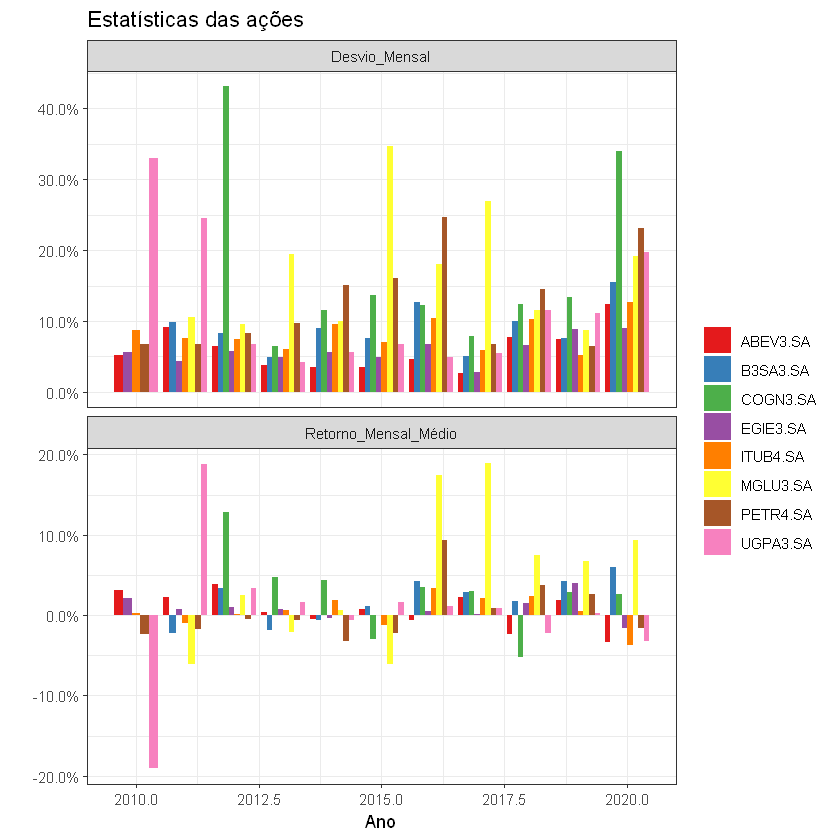

In [4]:
#Gráficos
retornos_m %>%
  ggplot(aes(year,value))+
  geom_col(aes(fill = symbol), position = "dodge")+
  scale_y_continuous(labels = scales::percent)+
  theme_bw()+
  scale_fill_brewer(palette = "Set1",
                    name = "")+
  facet_wrap(~statistic, scales = "free_y", nrow = 2)+
  labs(x = "Ano", y = "", title = "Estatísticas das ações")

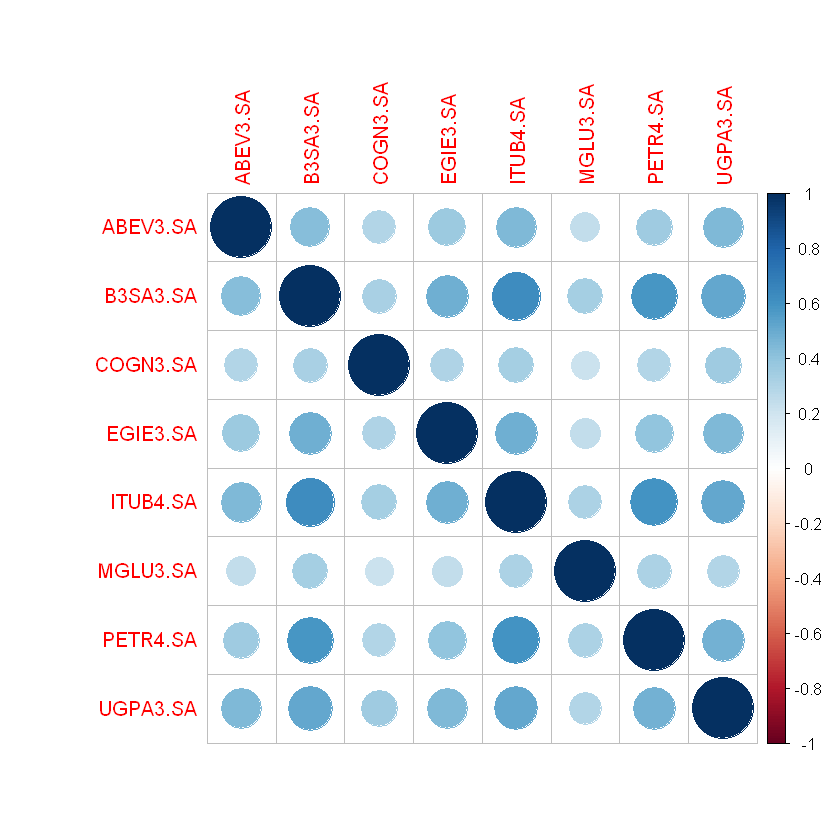

In [5]:
correlacao <- daily_retunr %>%
  spread(key = symbol, value = daily.returns) %>%
  na.omit()
correlacao <- cor(correlacao[,2:ncol(correlacao)])
corrplot(correlacao)

In [6]:
correlacao
min(correlacao)

,ABEV3.SA,B3SA3.SA,COGN3.SA,EGIE3.SA,ITUB4.SA,MGLU3.SA,PETR4.SA,UGPA3.SA
ABEV3.SA,1.0000000,0.4226660,0.2978424,0.3680911,0.4423340,0.2421926,0.3559490,0.4445692
B3SA3.SA,0.4226660,1.0000000,0.3209572,0.4819318,0.6268420,0.3348279,0.5803106,0.5193545
COGN3.SA,0.2978424,0.3209572,1.0000000,0.3092176,0.3353844,0.2125006,0.2980130,0.3511400
EGIE3.SA,0.3680911,0.4819318,0.3092176,1.0000000,0.4821938,0.2471324,0.3980936,0.4423159
ITUB4.SA,0.4423340,0.6268420,0.3353844,0.4821938,1.0000000,0.3102739,0.5961059,0.5107054
MGLU3.SA,0.2421926,0.3348279,0.2125006,0.2471324,0.3102739,1.0000000,0.3142818,0.2925309
PETR4.SA,0.3559490,0.5803106,0.2980130,0.3980936,0.5961059,0.3142818,1.0000000,0.4737848
UGPA3.SA,0.4445692,0.5193545,0.3511400,0.4423159,0.5107054,0.2925309,0.4737848,1.0000000


[1] 0.2125006